In [1]:
import os
import sys
import numpy as np
import librosa
import scipy
import librosa.display
from sklearn.decomposition import NMF
from matplotlib import pyplot as plt
from librosa.core import resample
from os import listdir
from os.path import join
from scipy.io.wavfile import write

sys.path.insert(0,"/home/milind/source_separation/nmf")
sys.path.insert(0,"/home/milind/source_separation/tools")
from nmf_local import *
from basic_functions import *

figsize = (10,8)

ModuleNotFoundError: No module named 'nmf_local'

In [2]:
path_audio = "/home/milind/source_separation/Monoaural_source_separation_using_Non-negative_matrix_factorization/orig4.wav"
path_rescaled_components = "/home/milind/source_separation/Monoaural_source_separation_using_Non-negative_matrix_factorization/orig4_rescaled/"

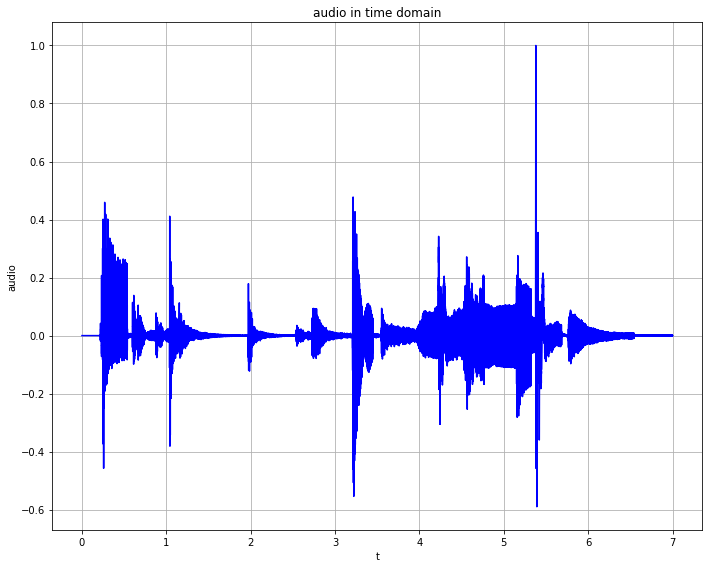

In [3]:
# loading audios
fs_target = 44100
audio, fs = librosa.load(path_audio,sr = fs_target)
# time domain representation
x = np.arange(len(audio))/fs_target
plotfigure(figsize, "t", "audio", "audio in time domain",x,audio,style= "b-" )

In [4]:
# fft details in time units
frame_size = 40e-3
overlap = 0.5
dft_size = frame_size

# fft details in terms of samples
n_fft = int(frame_size*fs_target)
hop_length = int((1-overlap)*frame_size*fs_target)

# DECISION MADE HERE! for window, center, and reflect 
window = scipy.signal.hanning(n_fft)
#print(n_fft)

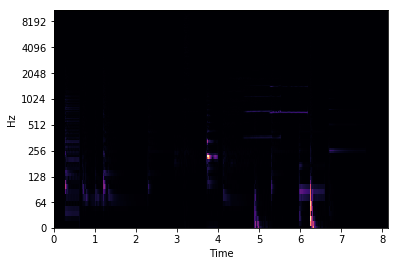

In [5]:
mag_spec = librosa.core.stft(audio, n_fft = n_fft, hop_length = hop_length) # using default windowAA
D = librosa.amplitude_to_db(np.abs(mag_spec), ref=np.max)
librosa.display.specshow(np.abs(mag_spec), y_axis='log', x_axis='time')
#librosa.display.specshow(np.abs(mag_spec), y_axis='log', x_axis='time')
plt.show()

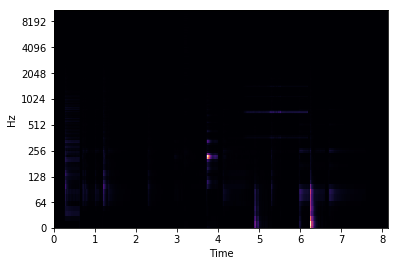

In [6]:
# modelling componenets using Least squares norm
model = NMF(n_components=7, init='random', random_state=0,solver="mu",beta_loss="kullback-leibler",max_iter = 1000)
W = model.fit_transform(np.abs(mag_spec))
H = model.components_
# Displaying the reconstructed spectrogram
librosa.display.specshow(np.dot(W,H), y_axis='log', x_axis='time')

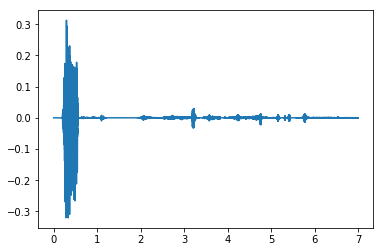

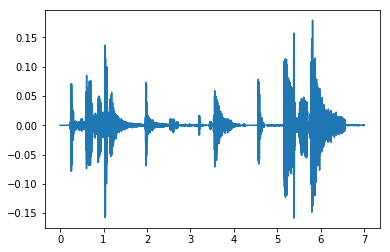

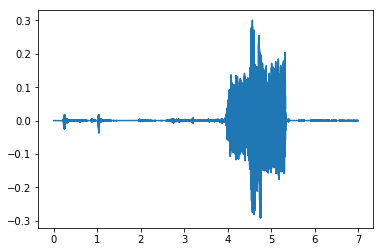

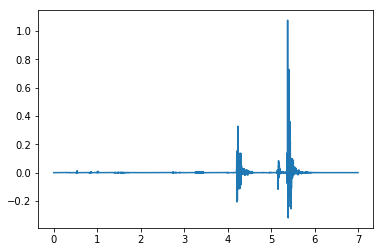

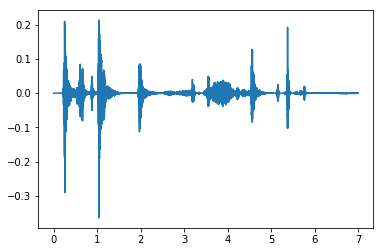

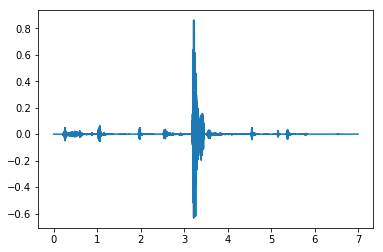

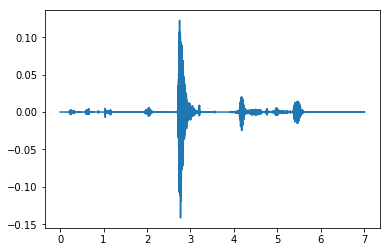

In [7]:
phase = np.angle(mag_spec)
n_fft = 2*np.shape(mag_spec)[0]-1
total = 0
audios = []
from scipy.io.wavfile import write
for i in range(0,np.shape(W)[1]):
    component= np.outer(W[:,i],(H[i,:]))
    component = component*phase
    audio2 = librosa.core.istft(component, hop_length=n_fft//2)
    audios.append(audio2)
    plt.figure()
    plt.plot(x,audio2)
    total = total + audio2 
    write("/home/milind/source_separation/Monoaural_source_separation_using_Non-negative_matrix_factorization/orig4_kl_div/component" +str(i) + ".wav", 44100, audio2)
    audio2_rescaled = audio2/ np.max(audio2)
    write("/home/milind/source_separation/Monoaural_source_separation_using_Non-negative_matrix_factorization/orig4_kl_div/component" +str(i) + "_rescaled.wav", 44100, audio2_rescaled)

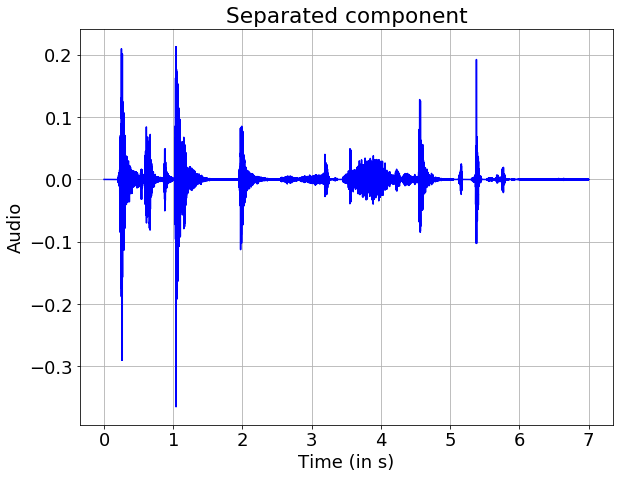

In [10]:
import matplotlib
matplotlib.rcParams.update({'font.size': 18})
plotfigure((9,7), "Time (in s)", "Audio", "Separated component", x, audios[4],"b-")

In [ ]:
print(len(audio))
# plotting sum of components and the original signal
plt.figure(figsize = (19,8))
plt.plot(x,total)
plt.plot(x,audio)
plt.show()

In [ ]:
path_audio_separated7 = "/home/milind/source_separation/Monoaural_source_separation_using_Non-negative_matrix_factorization/orig4_separated/separated4-7.wav"
fs_target = 44100
separated7, fs = librosa.load(path_audio_separated7,sr = fs_target)
y = np.arange(0,len(separated7)/fs_target,1/fs_target)
# time domain representation
plotfigure((5,4), "t", "audio", "audio in time domain",y,separated7,style= "b-" )

In [ ]:
# comparing similar looking components
component7 = audios[6][:len(y)]
plt.figure(figsize = (6,4))
plt.plot(y,component7)
plt.plot(y,separated7)
write("/home/milind/source_separation/Monoaural_source_separation_using_Non-negative_matrix_factorization/orig4_rescaled/component7.wav", 
       44100, component7)
# increasing magnitude
plt.show()
plt.figure(figsize = (6,4))
component7_rescaled = component7/np.max(component7)
plt.plot(y,component7_rescaled)
plt.show()
write("/home/milind/source_separation/Monoaural_source_separation_using_Non-negative_matrix_factorization/orig4_rescaled/component7_rescaled.wav", 
       44100, component7_rescaled)

In [ ]:
path_audio_separated4 = "/home/milind/source_separation/Monoaural_source_separation_using_Non-negative_matrix_factorization/orig4_separated/separated4-3.wav"
fs_target = 44100
separated4, fs = librosa.load(path_audio_separated4,sr = fs_target)
y = np.arange(0,len(separated7)/fs_target,1/fs_target)
# time domain representation
plotfigure((5,4), "t", "audio", "audio in time domain",y,separated4,style= "b-" )

# comparing similar looking components
component4 = audios[3][:len(y)]
plt.figure(figsize = (6,4))
plt.plot(y,separated4)
plt.plot(y,component4)

write("/home/milind/source_separation/Monoaural_source_separation_using_Non-negative_matrix_factorization/orig4_rescaled/component4.wav", 
      44100, component4)
# increasing magnitude
plt.show()
plt.figure(figsize = (6,4))
component4_rescaled = component4/np.max(component4)
plt.plot(y,component4_rescaled)
plt.show()
write("/home/milind/source_separation/Monoaural_source_separation_using_Non-negative_matrix_factorization/orig4_rescaled/component4_rescaled.wav", 
       44100, component4_rescaled)

# Things to do-

* apply filter 
* switch to kl div